In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from Bio.PDB import *
from scipy.spatial import ConvexHull

In [13]:
p = PDBParser()

def cal_volume(pdb_path):
    structure = p.get_structure('input', pdb_path)
    CA_coord = []
    for model in structure:
        for chain in model:
            for residue in chain:
                _vector = residue['CA'].get_vector()
                CA_coord.append([_vector[0], _vector[1], _vector[2]])
    
    points = np.array(CA_coord)
    print(CA_coord)
    volume = ConvexHull(points).volume
    return volume

In [14]:
# PDGFRA = {
#     'OPC': cal_volume('/lmh_data/work/sclab/analyse/3DMax/PDGFRA_OPC/tmpeokrdew7_1667112131170.pdb'),
#     'ODC': cal_volume('/lmh_data/work/sclab/analyse/3DMax/PDGFRA_ODC/tmpx4e2semj_1667112156246.pdb'),
#     'Astro': cal_volume('/lmh_data/work/sclab/analyse/3DMax/PDGFRA_Astro/tmpo0ac7x28_1667112170525.pdb')
# }

MBP = {
    'OPC': cal_volume('/lmh_data/work/sclab/analyse/3DMax/MBP_OPC/tmp1ex_vi7y_1667128114749.pdb'),
    'ODC': cal_volume('/lmh_data/work/sclab/analyse/3DMax/MBP_ODC/tmpnmmxsosm_1667128365473.pdb'),
    'Astro': cal_volume('/lmh_data/work/sclab/analyse/3DMax/MBP_Astro/tmpj4z96bq__1667111964388.pdb')
}

[[-5.038000106811523, 1.715999960899353, -8.680999755859375], [-4.11899995803833, 6.169000148773193, -5.11899995803833], [-4.388000011444092, -0.9279999732971191, -2.388000011444092], [-4.354000091552734, -1.940999984741211, 1.5180000066757202], [-1.7139999866485596, -6.7789998054504395, 2.371999979019165], [-3.9579999446868896, -9.057000160217285, 2.9660000801086426], [-4.6529998779296875, -6.116000175476074, -0.36800000071525574], [-3.13100004196167, 0.06599999964237213, 0.6819999814033508], [0.46700000762939453, -1.559000015258789, -4.446000099182129], [4.863999843597412, -4.8429999351501465, -2.802999973297119], [5.882999897003174, -1.0729999542236328, 2.3289999961853027], [4.749000072479248, 0.4909999966621399, -2.9049999713897705], [7.992000102996826, 3.125, -3.6050000190734863], [5.105000019073486, 6.670000076293945, -0.7080000042915344], [2.0889999866485596, 5.248000144958496, 2.1050000190734863], [4.309999942779541, 6.116000175476074, 5.943999767303467], [0.9950000047683716, 2

/root/miniconda3/envs/sclab/lib/python3.8/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/root/miniconda3/envs/sclab/lib/python3.8/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/root/miniconda3/envs/sclab/lib/python3.8/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)


In [8]:
PDGFRA_df = pd.DataFrame.from_dict(PDGFRA, orient='index', columns=['PDGFRA'])
MBP_df = pd.DataFrame.from_dict(MBP, orient='index', columns=['MBP'])
_df = pd.concat([PDGFRA_df, MBP_df], axis=1)
_df = pd.melt(_df.reset_index(), id_vars=["index"], value_vars=["PDGFRA", "MBP"])
_df

,index,variable,value
0,OPC,PDGFRA,453.270347
1,ODC,PDGFRA,529.365134
2,Astro,PDGFRA,408.348595
3,OPC,MBP,1200.107866
4,ODC,MBP,810.402377
5,Astro,MBP,1041.582345


<AxesSubplot: xlabel='index', ylabel='value'>

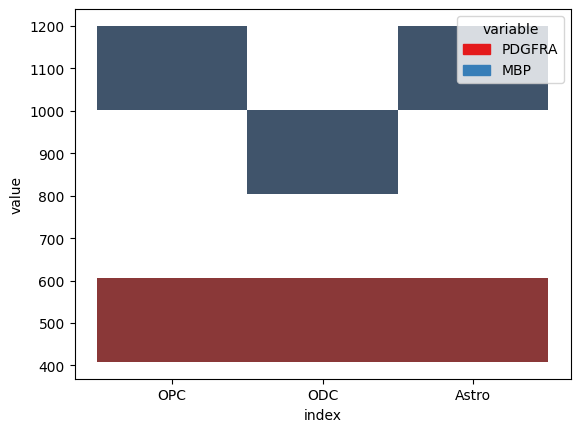

In [9]:
sns.histplot(_df, x="index", y="value", hue="variable", palette="Set1")

In [ ]:
sns.histplot(pd.melt(PDGFRA_df.reset_index(), id_vars=["index"]), x="index", y="value", palette="Set1")